In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv("covid_data/covid19_statewise.csv",parse_dates=['Date'])
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df = df.groupby(['Date','State']).sum()
df = df.reset_index()
df.head()

Date          State  ConfirmedCasesIndian  ConfirmedCasesForeign  \
0 2020-03-10          Delhi                     4                      0   
1 2020-03-10        Haryana                     0                     14   
2 2020-03-10  JK and Ladakh                     3                      0   
3 2020-03-10      Karnataka                     1                      0   
4 2020-03-10         Kerala                     9                      0   

   Discharged  Deaths  TotalConfirmed  
0           0       0               4  
1           0       0              14  
2           0       0               3  
3           0       0               1  
4           0       0               9

In [3]:
dff = df[df['Date'] == '2020-03-10'].sort_values(by='ConfirmedCasesIndian',ascending=False).head(10)

<BarContainer object of 10 artists>

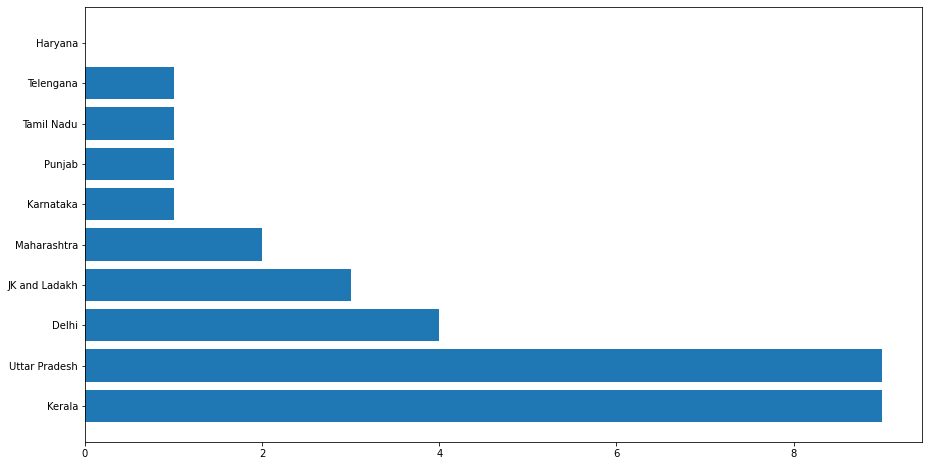

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['State'], dff['ConfirmedCasesIndian'])

In [5]:
df['State'].unique()

array(['Delhi', 'Haryana', 'JK and Ladakh', 'Karnataka', 'Kerala',
       'Maharashtra', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana',
       'Uttar Pradesh', 'Andhra Pradesh', 'Uttarakhand', 'Odisha',
       'Puducherry', 'West Bengal', 'Chandigarh', 'Chhattisgarh',
       'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar',
       'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland',
       'Meghalaya', 'D&N Haveli and Daman&Diu', 'Sikkim', 'Telangana'],
      dtype=object)

In [6]:
df['State'].nunique()

35

In [7]:
import random
r = lambda: random.randint(0,255)
state_colors = ['#%02X%02X%02X'%(r(),r(),r()) for i in range(35)]

In [8]:
colors = dict(zip(list(df['State'].unique()),state_colors))

Text(1, 0.4, '2020-03-10')

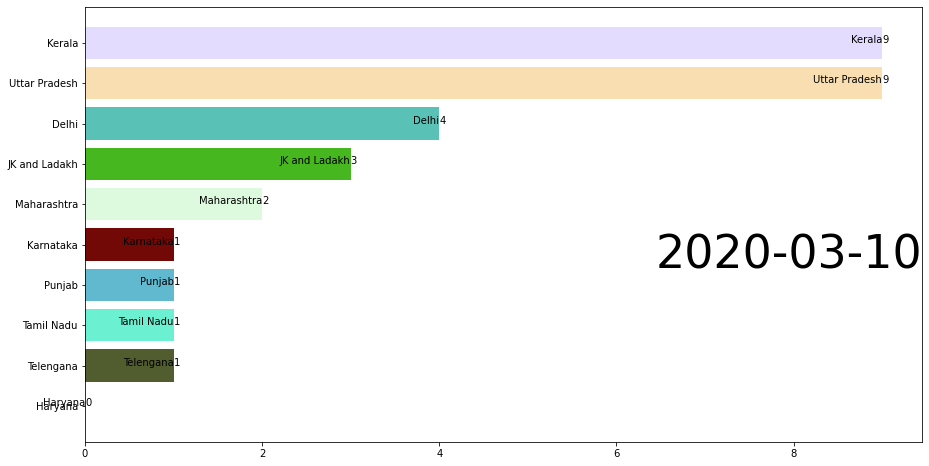

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
current_date = '2020-03-10'
dff = dff[::-1]
ax.barh(dff['State'], dff['ConfirmedCasesIndian'], color=[colors[x] for x in dff['State'].unique()])
for i, (value, name) in enumerate(zip(dff['ConfirmedCasesIndian'], dff['State'])):
    ax.text(value, i,     name,            ha='right')   
    ax.text(value, i,     value,           ha='left')  
# Add year right middle portion of canvas
ax.text(1, 0.4, current_date, transform=ax.transAxes, size=46, ha='right')

In [10]:
state_colors

['#5AC1B6',
 '#5E5BF9',
 '#47B71F',
 '#720907',
 '#E4DCFF',
 '#DEFADE',
 '#60B9CE',
 '#AAE294',
 '#6CF0D2',
 '#525D2F',
 '#F8DEB1',
 '#4B8C1C',
 '#A7842A',
 '#BD0211',
 '#53FC13',
 '#F226E1',
 '#943757',
 '#A3898D',
 '#C2C5F8',
 '#E4B256',
 '#58EE3A',
 '#59EABD',
 '#12118A',
 '#84AFA5',
 '#D8D3C6',
 '#8F6835',
 '#45A030',
 '#E26DBD',
 '#49A8D3',
 '#46CDBA',
 '#D219D8',
 '#F8490B',
 '#11F622',
 '#D318F0',
 '#587EC8']

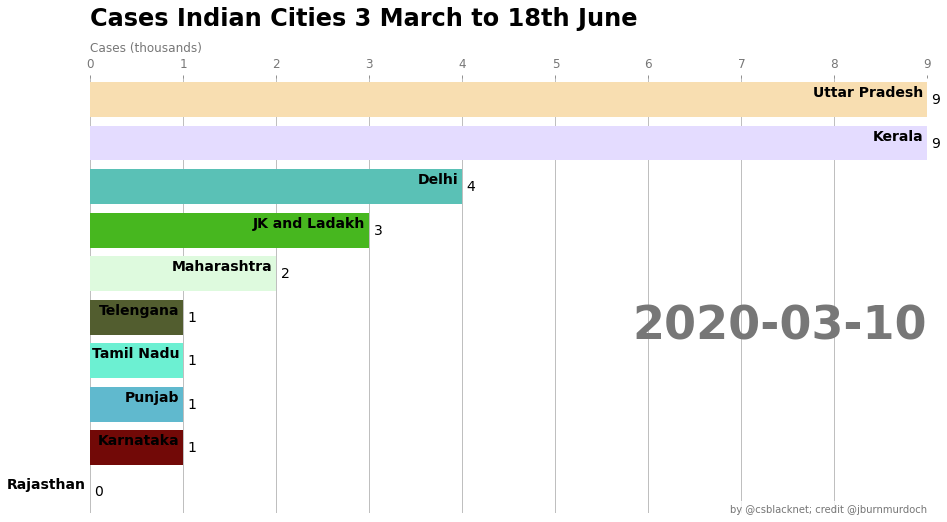

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(Date):
    dff = df[df['Date'].eq(Date)].sort_values(by='ConfirmedCasesIndian', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['State'], dff['ConfirmedCasesIndian'], color=[colors[x] for x in dff['State'].unique()])
    dx = dff['ConfirmedCasesIndian'].max() / 200
    for i, (value, name) in enumerate(zip(dff['ConfirmedCasesIndian'], dff['State'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, str(Date).split(' ')[0], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Cases (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Cases Indian Cities 3 March to 18th June',transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @csblacknet; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

draw_barchart(current_date)

In [12]:
import numpy as np
dates = pd.Series(df['Date'].unique())

In [13]:
str(dates[0]).split(' ')[0]

'2020-03-10'

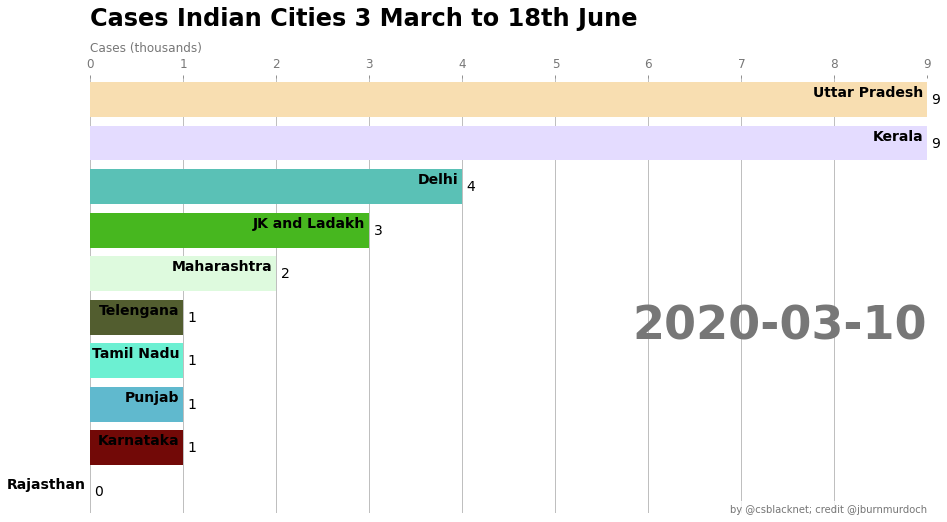

In [14]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=dates)
HTML(animator.to_jshtml()) 

In [15]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='@csblacknet'), bitrate=-1)

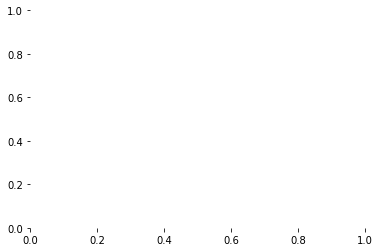

In [16]:
animator.save('im.mp4', writer=writer)